In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv('範例檔案_HW_009/data/application_train.csv')
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(list(train_data.columns))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [10]:
(train_data['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [12]:
train_data['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [16]:
abn_data=train_data[train_data['DAYS_EMPLOYED']==365243]
abn_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


In [17]:
nor_data=train_data[train_data['DAYS_EMPLOYED']!=365243]
nor_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
abn_data['TARGET'].mean()
print('The anomalies default on %0.4f%% loans' % (abn_data['TARGET'].mean()*100))

The anomalies default on 5.3996% loans


In [22]:
abn_data['TARGET'].mean()
print('The nomalies default on %0.4f%% loans' % (nor_data['TARGET'].mean()*100))

The nomalies default on 8.6600% loans


In [23]:
len(train_data)

307511

In [25]:
train_data['DAYS_EMPLOYED_NOR']=train_data['DAYS_EMPLOYED']!=365243
train_data.loc[:,['DAYS_EMPLOYED','DAYS_EMPLOYED_NOR']]

,DAYS_EMPLOYED,DAYS_EMPLOYED_NOR
0,-637,True
1,-1188,True
2,-225,True
3,-3039,True
4,-3038,True
...,...,...
307506,-236,True
307507,365243,False
307508,-7921,True
307509,-4786,True


In [27]:
train_data['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

In [28]:
import matplotlib.pyplot as ply

Text(0, 0.5, 'Counts')

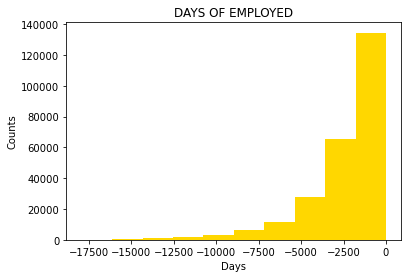

In [30]:
train_data['DAYS_EMPLOYED'].plot.hist(title='DAYS OF EMPLOYED',color='gold')
ply.xlabel('Days')
ply.ylabel('Counts')

In [31]:
print(train_data[~train_data.OWN_CAR_AGE.isnull()]['OWN_CAR_AGE'])

2         26.0
6         17.0
7          8.0
13        23.0
15        17.0
          ... 
307492     2.0
307494    15.0
307495     2.0
307497     0.0
307498    10.0
Name: OWN_CAR_AGE, Length: 104582, dtype: float64


Text(0, 0.5, 'Counts')

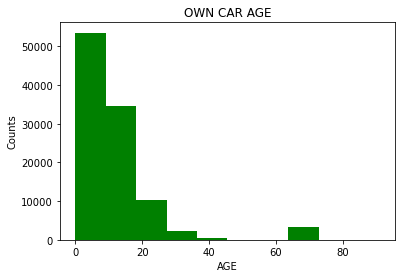

In [35]:
ply.hist(train_data[~train_data.OWN_CAR_AGE.isnull()]['OWN_CAR_AGE'],color='green')
ply.title('OWN CAR AGE')
ply.xlabel('AGE')
ply.ylabel('Counts')

In [37]:
train_data[train_data['OWN_CAR_AGE']>50]['OWN_CAR_AGE'].value_counts()

64.0    2443
65.0     891
54.0      12
55.0       4
51.0       3
91.0       2
63.0       2
57.0       1
69.0       1
52.0       1
56.0       1
Name: OWN_CAR_AGE, dtype: int64

In [38]:
train_data['OWN_CAR_AGE>50']=train_data['OWN_CAR_AGE']>50
train_data.loc[:,['OWN_CAR_AGE','OWN_CAR_AGE>50']]

,OWN_CAR_AGE,OWN_CAR_AGE>50
0,NaN,False
1,NaN,False
2,26.0,False
3,NaN,False
4,NaN,False
...,...,...
307506,NaN,False
307507,NaN,False
307508,NaN,False
307509,NaN,False


In [42]:
print('The target of own car age is %0.4f%%' % (train_data[train_data['OWN_CAR_AGE']>50]['TARGET'].mean()*100))

The target of own car age is 8.3606%


In [43]:
print('The target of own car age is %0.4f%%' % (train_data[train_data['OWN_CAR_AGE']<=50]['TARGET'].mean()*100))

The target of own car age is 7.2070%
